<a href="https://colab.research.google.com/github/birajsilwal/Custom_Linear_Regression/blob/main/Custom_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf

In [ ]:
# create random sample data
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

In [ ]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [ ]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

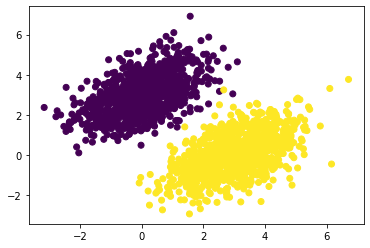

In [ ]:
# plot the input
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [ ]:
# variables 
W = tf.Variable(initial_value=tf.random.uniform(shape=(2, 1)))
b = tf.Variable(initial_value=tf.random.uniform(shape=(1,)))

In [ ]:
# create a model
def model(inputs):
  return tf.matmul(inputs, W) + b

In [ ]:
# calculate loss
def square_loss(targets, predictions):
  per_sample_losses = tf.square(targets - predictions)
  return tf.reduce_mean(per_sample_losses)

In [ ]:
# train the model
lr = 0.1

def training_steps(inputs, targets):
  with tf.GradientTape() as tape:
    predictions = model(inputs)
    loss = square_loss(targets, predictions)
  gradients_wrt_w, gradients_wrt_b = tape.gradient(loss, [W, b])
  W.assign_sub(gradients_wrt_w * lr)
  b.assign_sub(gradients_wrt_b * lr)
  return loss

In [ ]:
# train the model multiple times
for step in range(50):
  loss = training_steps(inputs, targets)
  print(f"Loss at step {step}: {loss:.4f}")


Loss at step 0: 3.1774
Loss at step 1: 0.1654
Loss at step 2: 0.0781
Loss at step 3: 0.0643
Loss at step 4: 0.0597
Loss at step 5: 0.0564
Loss at step 6: 0.0536
Loss at step 7: 0.0510
Loss at step 8: 0.0486
Loss at step 9: 0.0465
Loss at step 10: 0.0445
Loss at step 11: 0.0427
Loss at step 12: 0.0411
Loss at step 13: 0.0396
Loss at step 14: 0.0382
Loss at step 15: 0.0370
Loss at step 16: 0.0358
Loss at step 17: 0.0348
Loss at step 18: 0.0338
Loss at step 19: 0.0330
Loss at step 20: 0.0322
Loss at step 21: 0.0314
Loss at step 22: 0.0308
Loss at step 23: 0.0302
Loss at step 24: 0.0296
Loss at step 25: 0.0291
Loss at step 26: 0.0287
Loss at step 27: 0.0282
Loss at step 28: 0.0278
Loss at step 29: 0.0275
Loss at step 30: 0.0272
Loss at step 31: 0.0269
Loss at step 32: 0.0266
Loss at step 33: 0.0264
Loss at step 34: 0.0262
Loss at step 35: 0.0260
Loss at step 36: 0.0258
Loss at step 37: 0.0256
Loss at step 38: 0.0254
Loss at step 39: 0.0253
Loss at step 40: 0.0252
Loss at step 41: 0.0251
Lo